## Clustering person in hospital  :

#### Import library :

In [1]:
from utils import *
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import os
%matplotlib inline

#### Read data :

In [2]:
df = pd.read_excel('./Data/data for clustering-modified.xlsx')
df_patient = pd.read_excel('./Data/Hospital1.xlsx')
df_clusters = pd.read_excel('./Data/newkmeansresults.xlsx')



In [25]:
# incl = ['Home', 'Away', 'Shops']    
# for k, g in df[df['D'].isin(incl)].groupby('D'):
#     g.to_csv(f'{k}.csv')  # '{}.csv'.format(k)
# https://stackoverflow.com/questions/50829206/save-pandas-groups-to-separate-csv-files

# cnames = list(df.columns.values)
# ci = cnames[8]
# c_id = cnames[0]

# print(ci)
# class_list = set(list(df[ci]))
# print(class_list)


# for k, g in df[df[ci].isin(class_list)].groupby(ci):
#     patient_list = g[c_id]
#     patient_ck = df_patient[df_patient['Patient ID'].isin(patient_list)]

#     patient_ck.to_csv(f'result/{numClusters}/csv/{k}.csv')  # '{}.csv'.format(k)
#     patient_ck.to_excel(f'result/{numClusters}/xlsx/{k}.xlsx')  # '{}.xlsx'.format(k)

cnames = list(df_clusters.columns.values)
cnames_main = list(df.columns.values)

c_cl = cnames[1]
c_id = cnames[0]
class_list = set(list(df_clusters[c_cl]))
# df_clusters
cnames
class_list

# for k, g in df[df[ci].isin(class_list)].groupby(c_cl):
#     patient_list = g[c_id]
#     patient_ck = df_patient[df_patient['Patient ID'].isin(patient_list)]

#     patient_ck.to_csv(f'result/{numClusters}/csv/{k}.csv')  # '{}.csv'.format(k)
#     patient_ck.to_excel(f'result/{numClusters}/xlsx/{k}.xlsx')  # '{}.xlsx'.format(k)
ci_m = cnames_main[0]
df[ci_m]

df_clusters_grp = df_clusters.groupby(by=c_cl)

# for k, g in df[df[ci_m].isin(class_list)].groupby(c_cl):
#     patient_list = g[c_id]
#     patient_ck = df_patient[df_patient['Patient ID'].isin(patient_list)]

#     patient_ck.to_csv(f'result/{numClusters}/csv/{k}.csv')  # '{}.csv'.format(k)
#     patient_ck.to_excel(f'result/{numClusters}/xlsx/{k}.xlsx')  # '{}.xlsx'.format(k)
# df_clusters_grp[0]
for k,g in df_clusters_grp:
    patient_list = g[c_id]
    patient_ck = df_patient[df_patient['Patient ID'].isin(patient_list)]
    patient_ck.to_csv(f'resultn/csv/{k}.csv')  # '{}.csv'.format(k)
    patient_ck.to_excel(f'resultn/xlsx/{k}.xlsx')  # '{}.xlsx'.format(k)



#### Report : 

In [3]:
df.head()

# df_patient.head()

شناسه بیمار جنسیت  سن بیمار هنگام مصدومیت                 علت تروما  \
0      1202020   مرد                    17.0  ضربه برنده (بریدگی، ...)   
1      1643506   مرد                    15.0                      سقوط   
2      1577950    زن                    37.0                      سقوط   
3      1743715   مرد                    35.0  ضربه برنده (بریدگی، ...)   
4      1736936   مرد                    22.0      حوادث ترافیک جاده‌ای   

  تعداد دفعات بستری به علت تروما  ISS  \
0                            NaN  1.0   
1                              1  1.0   
2                            NaN  4.0   
3                            NaN  1.0   
4                            NaN  4.0   

   1.AIS PREDOT CODE (کد شش رقمی قبل از اعشار) منعکس کننده آسیب‌های بیمار  \
0                                           730299.0                        
1                                           810600.0                        
2                                           250610.0                        
3                                           730899.0                        
4                                           857300.0                        

                  1.تشخیص نهایی آسیب  را انتخاب کنید  
0  T01.6 -- Open wounds involving multiple region...  
1         S91.3 -- Open wound of other parts of foot  
2                      S02.6 -- Fracture of mandible  
3  S61.9 -- Open wound of wrist and hand part, pa...  
4         S91.3 -- Open wound of other parts of foot

In [4]:
df.shape

(4705, 8)

In [5]:
df.isna().sum()

شناسه بیمار                                                                  0
جنسیت                                                                        2
سن بیمار هنگام مصدومیت                                                       3
علت تروما                                                                    2
تعداد دفعات بستری به علت تروما                                            3797
ISS                                                                         17
1.AIS PREDOT CODE (کد شش رقمی قبل از اعشار) منعکس کننده آسیب‌های بیمار      13
1.تشخیص نهایی آسیب  را انتخاب کنید                                         212
dtype: int64

#### PreProcessing  :

In [7]:
# fill nan value 
df = FillNa(df = df)

# make copy from df
copy_df = df.copy()
copy_df = copy_df.dropna()
copy_df = copy_df.reset_index(drop=True)

In [8]:
# change column type
df , transition = TransitionType2(df = df)

شناسه بیمار
سن بیمار هنگام مصدومیت
ISS
1.AIS PREDOT CODE (کد شش رقمی قبل از اعشار) منعکس کننده آسیب‌های بیمار


#### Report : 

In [9]:
transition

{'جنسیت': [['مرد', 1], ['زن', 2], ['نامشخص', 3]],
 'علت تروما': [['ضربه برنده (بریدگی، ...)', 1],
  ['سقوط', 2],
  ['حوادث ترافیک جاده\u200cای', 3],
  ['آسیب\u200cهای غیر برنده (آوار، گیر کردن در دستگاه، چماق، ...)', 4],
  ['حمله حیوانات (گاز، پنجه، شاخ، ...)', 5],
  ['سایر (لطفاً توضیح دهید)', 6],
  ['سلاح گرم', 7],
  ['سایر تصادفات حمل و نقل (غیرجاده¬ای، قطار، هواپیما، کشتی)', 8],
  ['نامشخص', 9],
  ['برق گرفتگی', 10],
  ['مسمومیت (استنشاقی، دارویی، مواد مخدر و غیره)', 11],
  ['سوختگی غیرمستقیم (تماس با گرما، آب جوش)', 12],
  ['سوختگی مستقیم (سیگار، آتش، شعله)', 13]],
 'تعداد دفعات بستری به علت تروما': [[0, 1],
  [1, 2],
  [2, 3],
  [3, 4],
  [5, 5],
  [4, 6],
  ['-', 7],
  [7, 8],
  [6, 9]],
 '1.تشخیص نهایی آسیب  را انتخاب کنید': [['T01.6 -- Open wounds involving multiple regions of upper limb(s) with lower limb(s)',
   1],
  ['S91.3 -- Open wound of other parts of foot', 2],
  ['S02.6 -- Fracture of mandible', 3],
  ['S61.9 -- Open wound of wrist and hand part, part unspecified', 4

In [10]:
df.describe()

شناسه بیمار       جنسیت  سن بیمار هنگام مصدومیت    علت تروما  \
count  4.705000e+03  4705.00000             4702.000000  4705.000000   
mean   1.501321e+06     1.14729               39.337091     2.530712   
std    2.881129e+05     0.35563               18.728508     1.141351   
min    1.000138e+06     1.00000                0.000000     1.000000   
25%    1.253266e+06     1.00000               25.000000     2.000000   
50%    1.503703e+06     1.00000               35.000000     3.000000   
75%    1.745914e+06     1.00000               51.000000     3.000000   
max    1.999913e+06     3.00000               96.000000    13.000000   

       تعداد دفعات بستری به علت تروما          ISS  \
count                     4705.000000  4705.000000   
mean                         1.251647     3.556004   
std                          0.629837     3.470524   
min                          1.000000     0.000000   
25%                          1.000000     1.000000   
50%                          1.000000     4.000000   
75%                          1.000000     4.000000   
max                          9.000000    27.000000   

       1.AIS PREDOT CODE (کد شش رقمی قبل از اعشار) منعکس کننده آسیب‌های بیمار  \
count                                        4705.000000                        
mean                                       690845.070988                        
std                                        222801.316834                        
min                                         80000.000000                        
25%                                        710099.000000                        
50%                                        752311.000000                        
75%                                        852002.000000                        
max                                        910001.000000                        

       1.تشخیص نهایی آسیب  را انتخاب کنید  
count                         4705.000000  
mean                           107.083528  
std                             85.976422  
min                              1.000000  
25%                             25.000000  
50%                             79.000000  
75%                            198.000000  
max                            347.000000

#### Drop nan value 

In [11]:
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

(4702, 8)

#### Show data : 

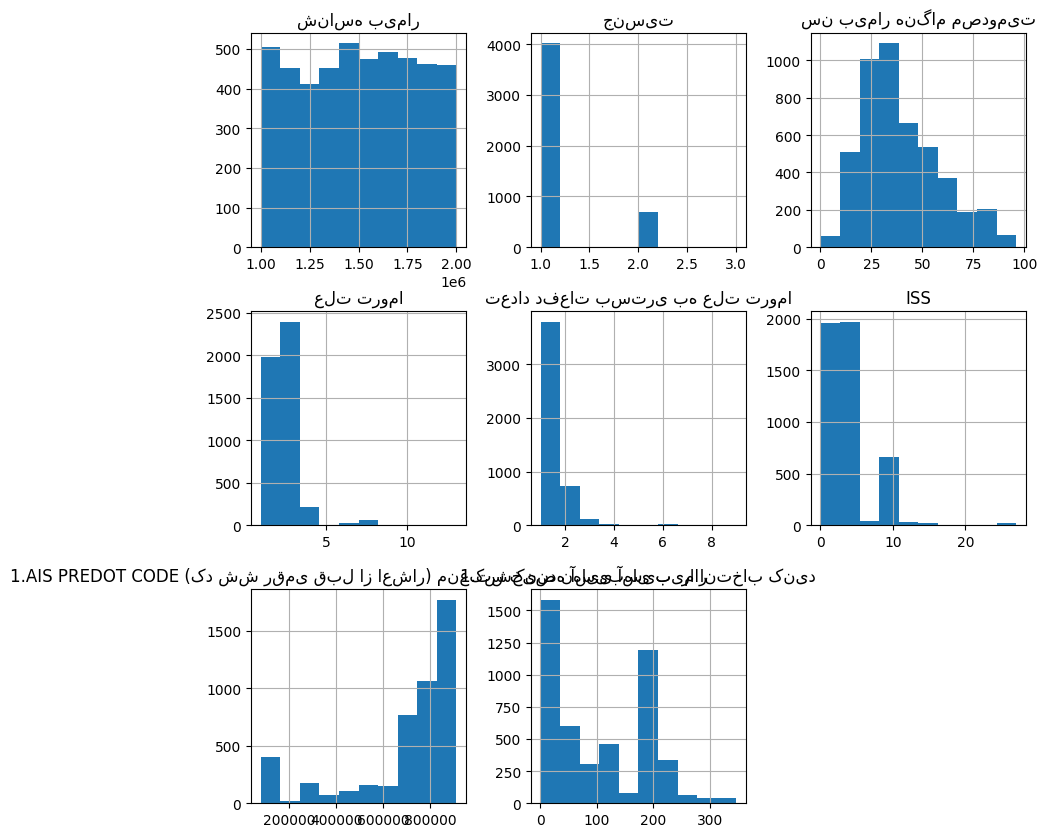

In [12]:
df.hist(figsize=(10 , 10))
plt.show()

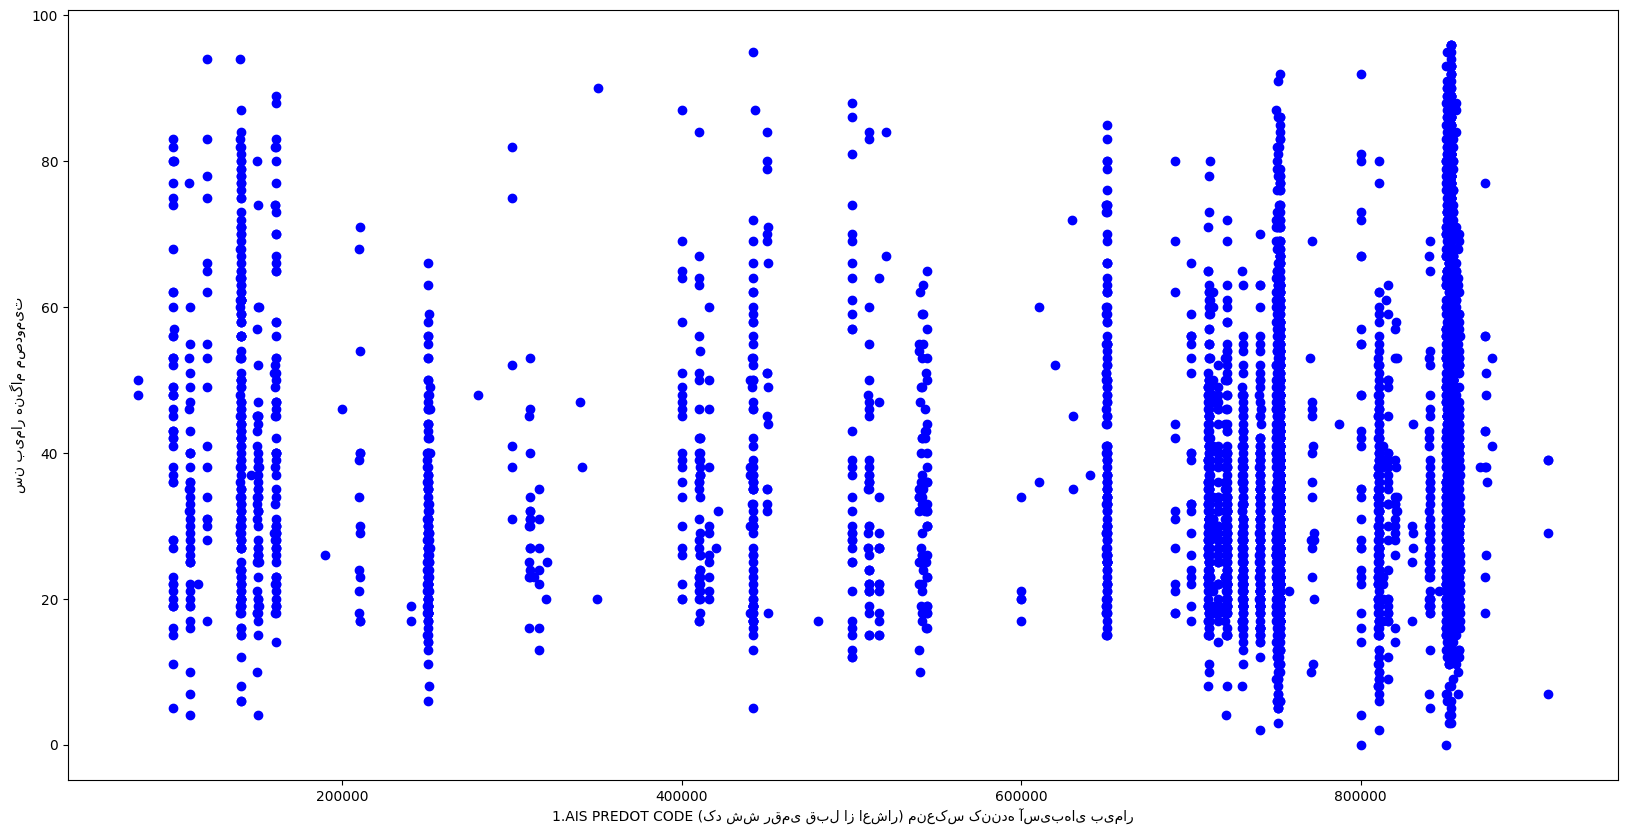

In [13]:
fig, axs = plt.subplots(1,1 , figsize=(20 , 10))

axs.scatter(df['1.AIS PREDOT CODE (کد شش رقمی قبل از اعشار) منعکس کننده آسیب‌های بیمار'] ,
            df['سن بیمار هنگام مصدومیت'] , color = 'Blue')
axs.set_xlabel('1.AIS PREDOT CODE (کد شش رقمی قبل از اعشار) منعکس کننده آسیب‌های بیمار')
axs.set_ylabel('سن بیمار هنگام مصدومیت')
plt.show()

#### My Plots

##### plot main

, 'سن بیمار هنگام مصدومیت'/'AIS '


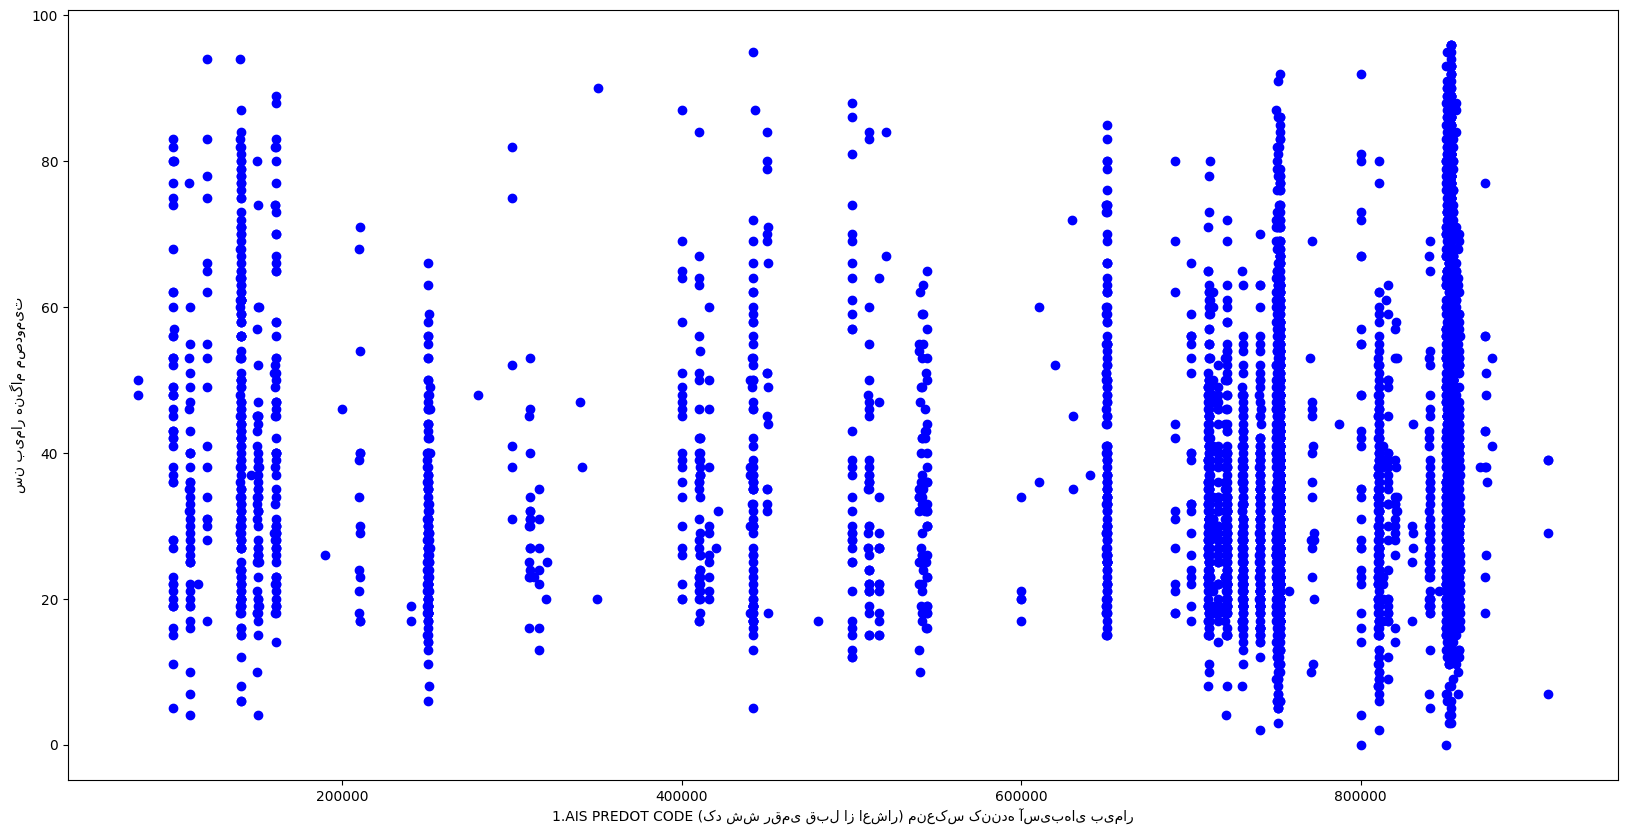

In [14]:
cnames = list(df.columns.values)
c_x = cnames[6]
c_y = cnames[2]
c_x,c_y

fig, axs = plt.subplots(1,1 , figsize=(20 , 10))

axs.scatter(df[c_x] , df[c_y] , color = 'Blue')
axs.set_xlabel(c_x)
axs.set_ylabel(c_y)
plt.show()
# # df


##### plot 1

'سن بیمار هنگام مصدومیت', / 'ISS',


['شناسه بیمار', 'جنسیت', 'سن بیمار هنگام مصدومیت', 'علت تروما', 'تعداد دفعات بستری به علت تروما', 'ISS', '1.AIS PREDOT CODE (کد شش رقمی قبل از اعشار) منعکس کننده آسیب\u200cهای بیمار', '1.تشخیص نهایی آسیب  را انتخاب کنید']


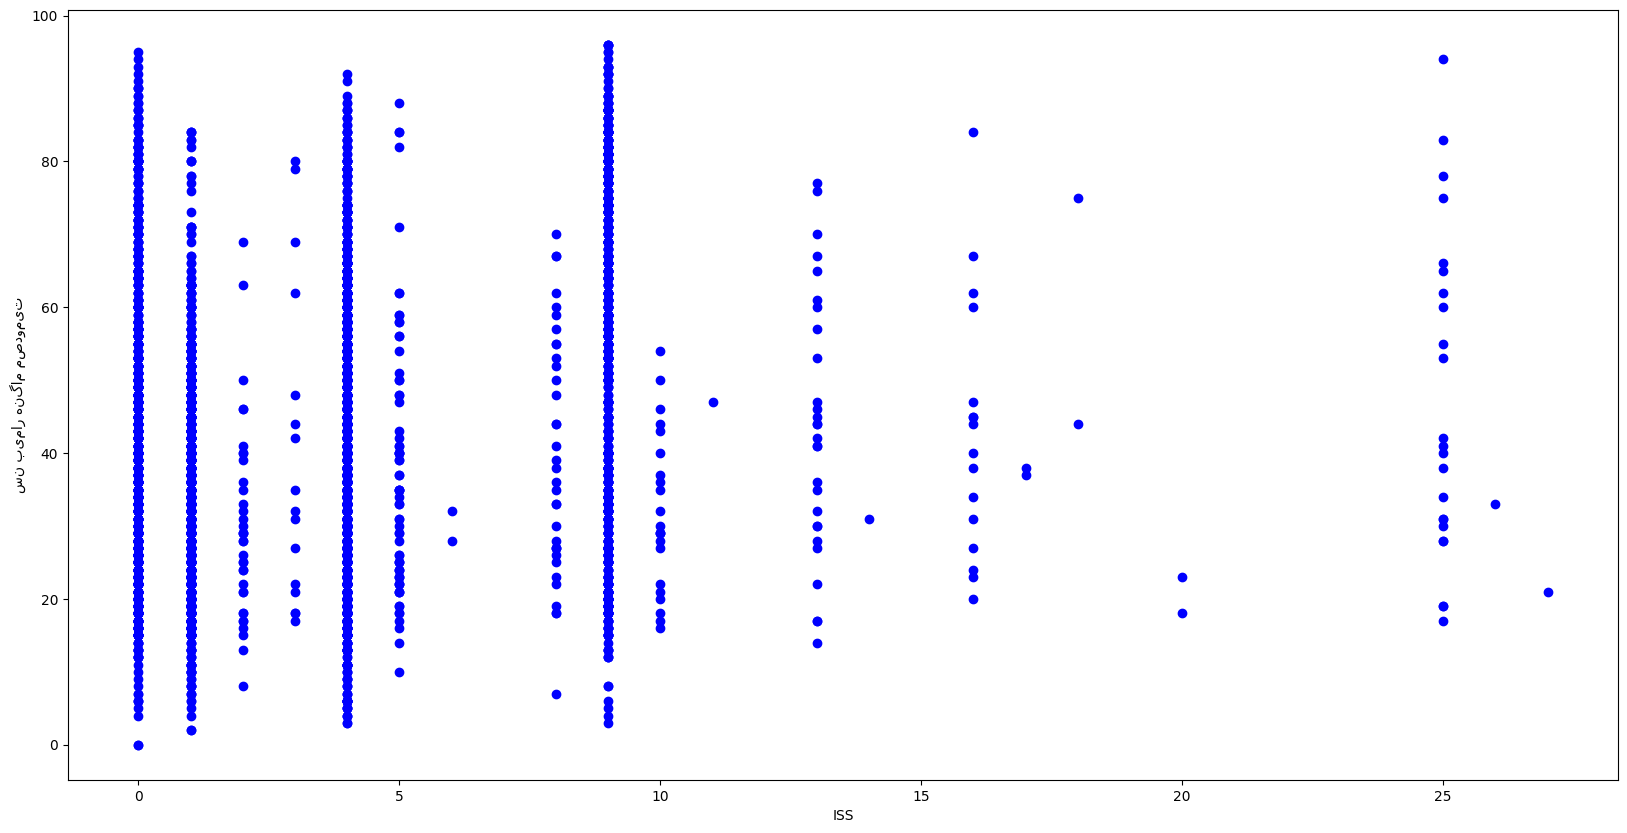

In [15]:
cnames = list(df.columns.values)
print(cnames)
c_x = cnames[5]
c_y = cnames[2]
c_x,c_y

fig, axs = plt.subplots(1,1 , figsize=(20 , 10))

axs.scatter(df[c_x] , df[c_y] , color = 'Blue')
axs.set_xlabel(c_x)
axs.set_ylabel(c_y)
plt.show()


'جنسیت'/'ISS',

['شناسه بیمار', 'جنسیت', 'سن بیمار هنگام مصدومیت', 'علت تروما', 'تعداد دفعات بستری به علت تروما', 'ISS', '1.AIS PREDOT CODE (کد شش رقمی قبل از اعشار) منعکس کننده آسیب\u200cهای بیمار', '1.تشخیص نهایی آسیب  را انتخاب کنید']


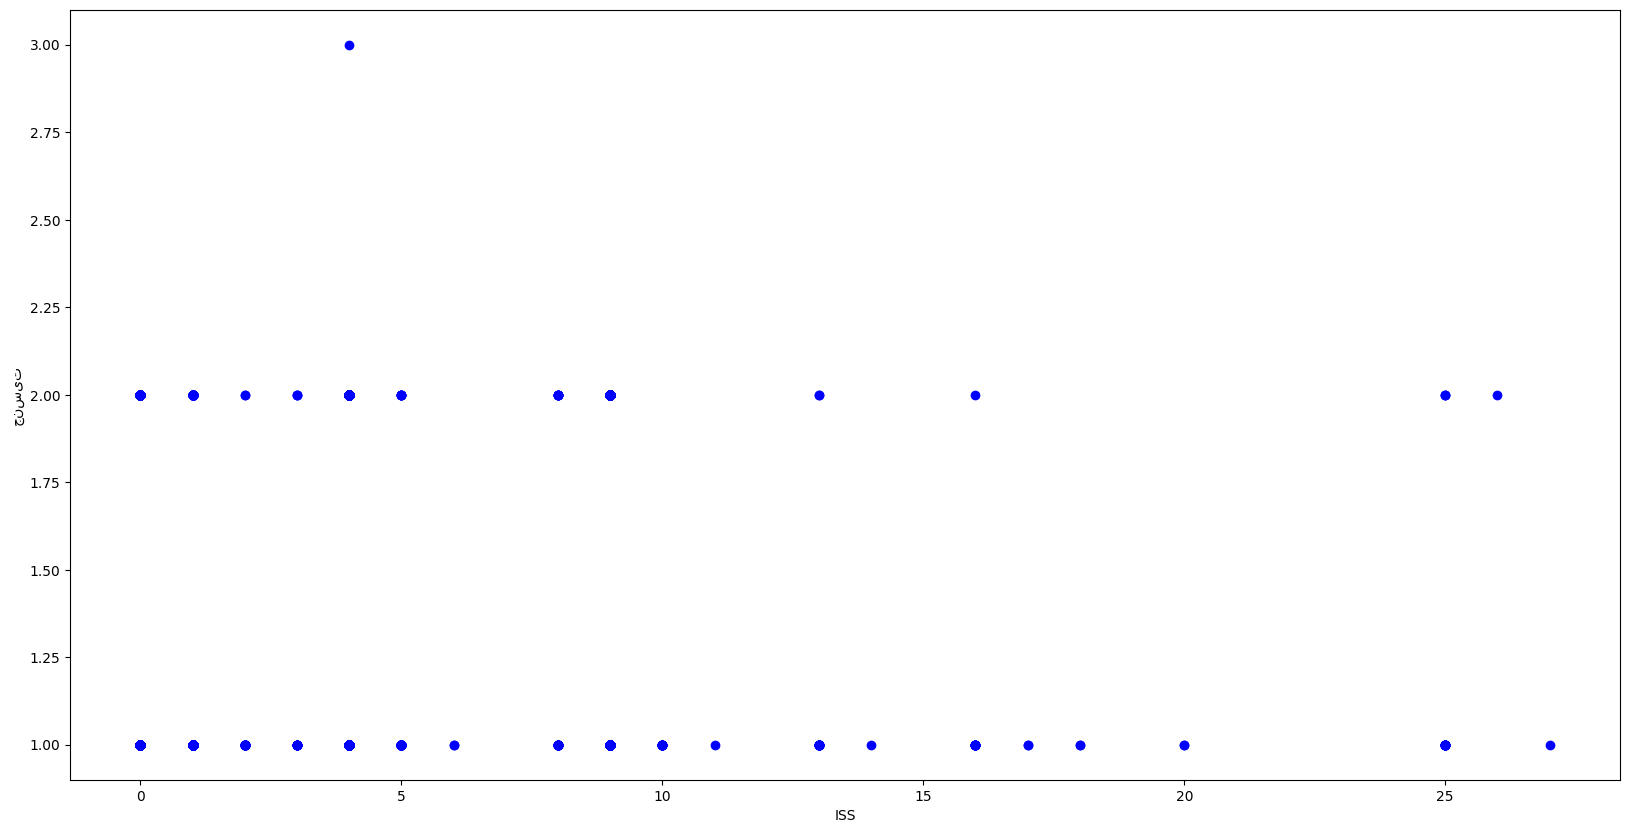

In [16]:
cnames = list(df.columns.values)
print(cnames)
c_x = cnames[5]
c_y = cnames[1]
c_x,c_y

fig, axs = plt.subplots(1,1 , figsize=(20 , 10))

axs.scatter(df[c_x] , df[c_y] , color = 'Blue')
axs.set_xlabel(c_x)
axs.set_ylabel(c_y)
plt.show()


'علت تروما'/'ISS',

['شناسه بیمار', 'جنسیت', 'سن بیمار هنگام مصدومیت', 'علت تروما', 'تعداد دفعات بستری به علت تروما', 'ISS', '1.AIS PREDOT CODE (کد شش رقمی قبل از اعشار) منعکس کننده آسیب\u200cهای بیمار', '1.تشخیص نهایی آسیب  را انتخاب کنید']


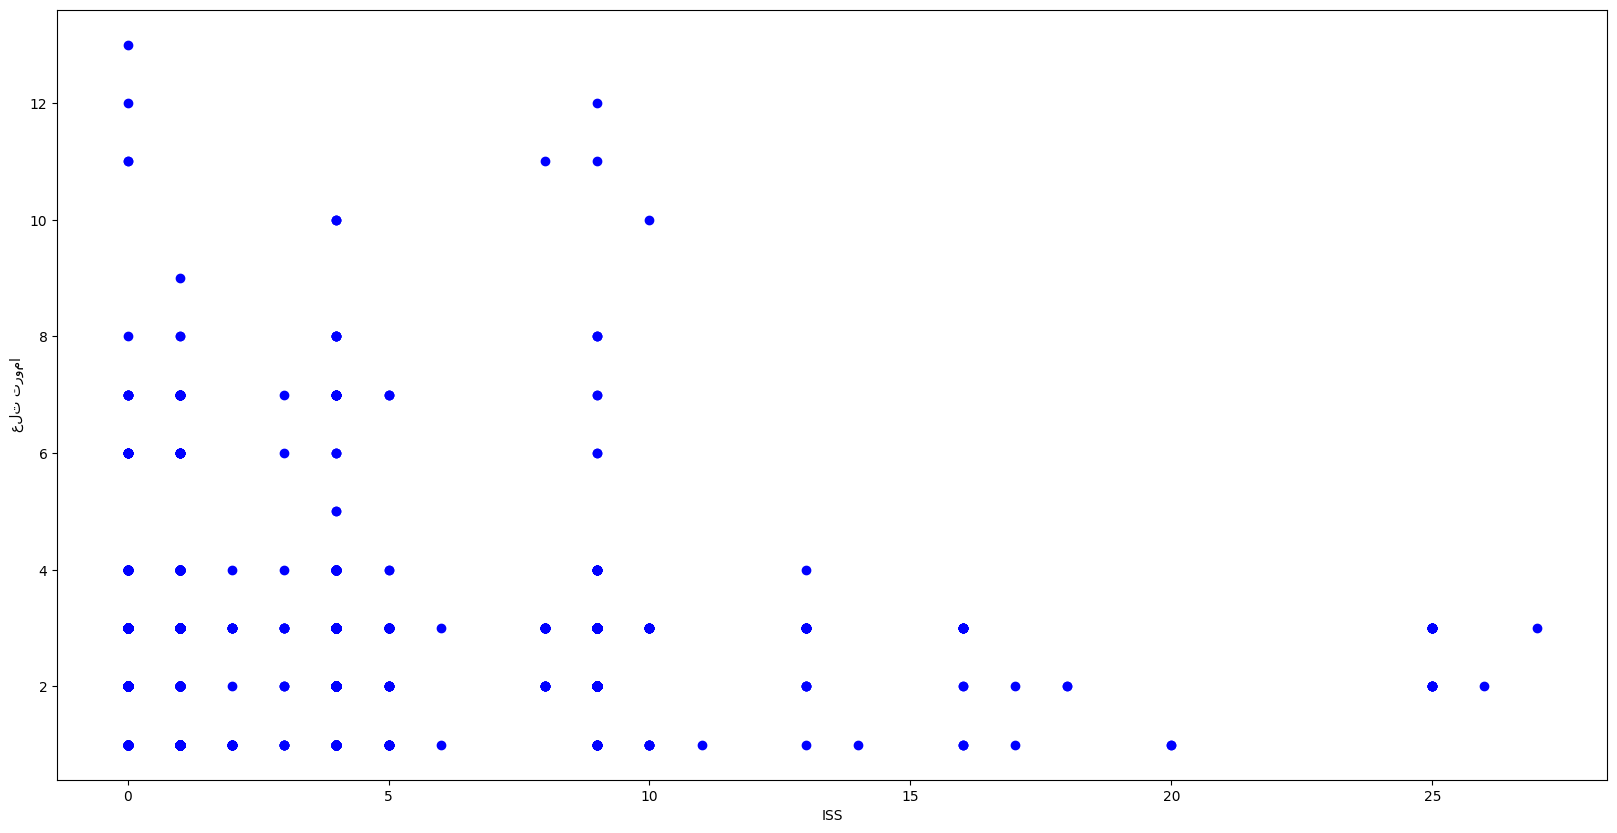

In [17]:
cnames = list(df.columns.values)
print(cnames)
c_x = cnames[5]
c_y = cnames[3]
c_x,c_y

fig, axs = plt.subplots(1,1 , figsize=(20 , 10))

axs.scatter(df[c_x] , df[c_y] , color = 'Blue')
axs.set_xlabel(c_x)
axs.set_ylabel(c_y)
plt.show()


'تعداد دفعات بستری به علت تروما'/'ISS',

['شناسه بیمار', 'جنسیت', 'سن بیمار هنگام مصدومیت', 'علت تروما', 'تعداد دفعات بستری به علت تروما', 'ISS', '1.AIS PREDOT CODE (کد شش رقمی قبل از اعشار) منعکس کننده آسیب\u200cهای بیمار', '1.تشخیص نهایی آسیب  را انتخاب کنید']


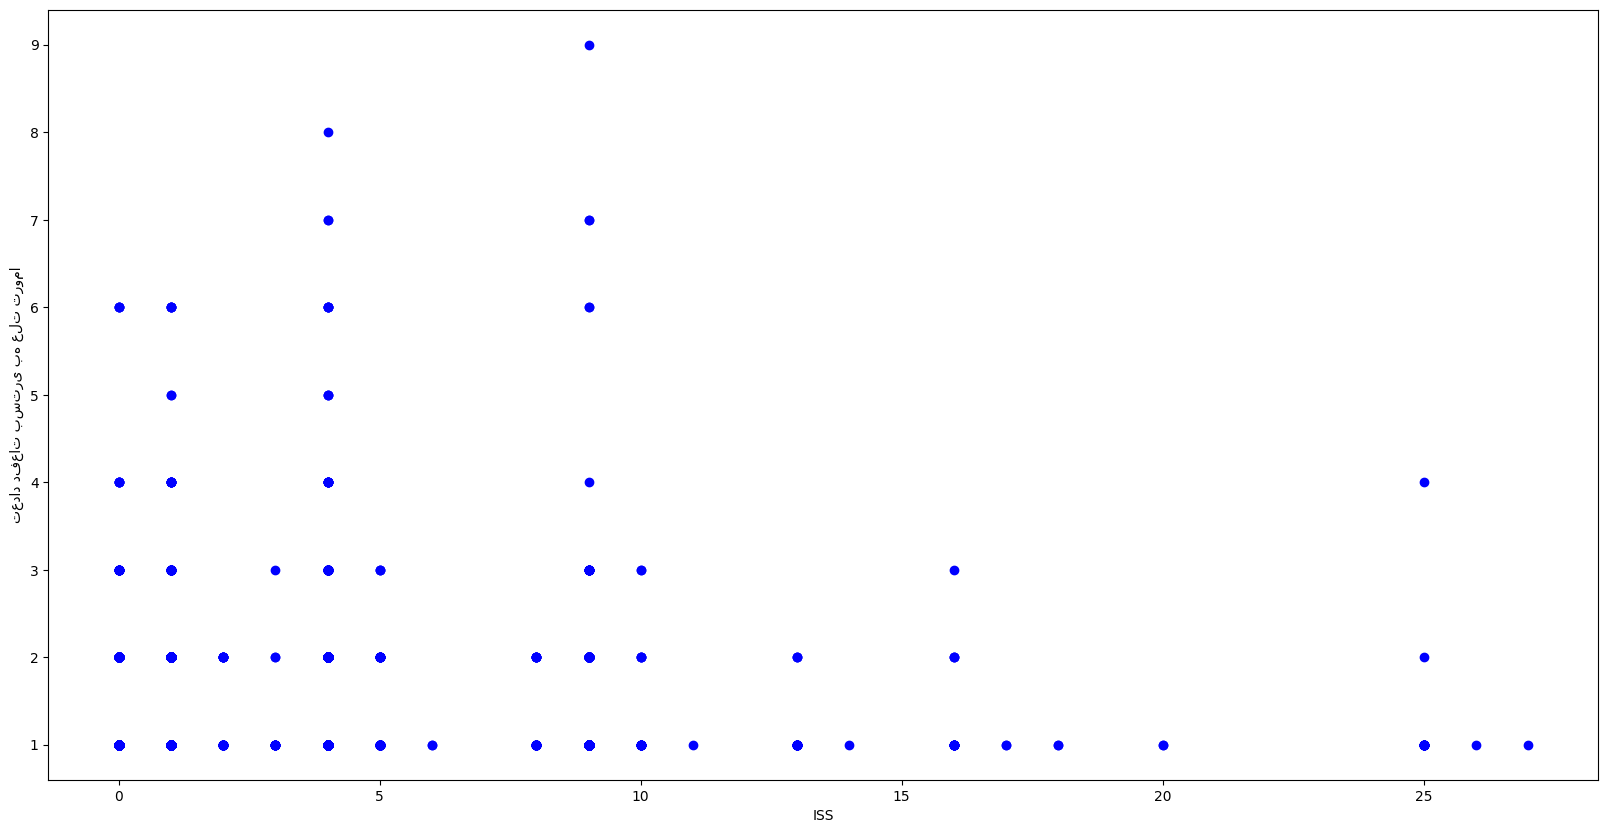

In [18]:
cnames = list(df.columns.values)
print(cnames)
c_x = cnames[5]
c_y = cnames[4]
c_x,c_y

fig, axs = plt.subplots(1,1 , figsize=(20 , 10))

axs.scatter(df[c_x] , df[c_y] , color = 'Blue')
axs.set_xlabel(c_x)
axs.set_ylabel(c_y)
plt.show()


'علت تروما'/'AIS 

['شناسه بیمار', 'جنسیت', 'سن بیمار هنگام مصدومیت', 'علت تروما', 'تعداد دفعات بستری به علت تروما', 'ISS', '1.AIS PREDOT CODE (کد شش رقمی قبل از اعشار) منعکس کننده آسیب\u200cهای بیمار', '1.تشخیص نهایی آسیب  را انتخاب کنید']


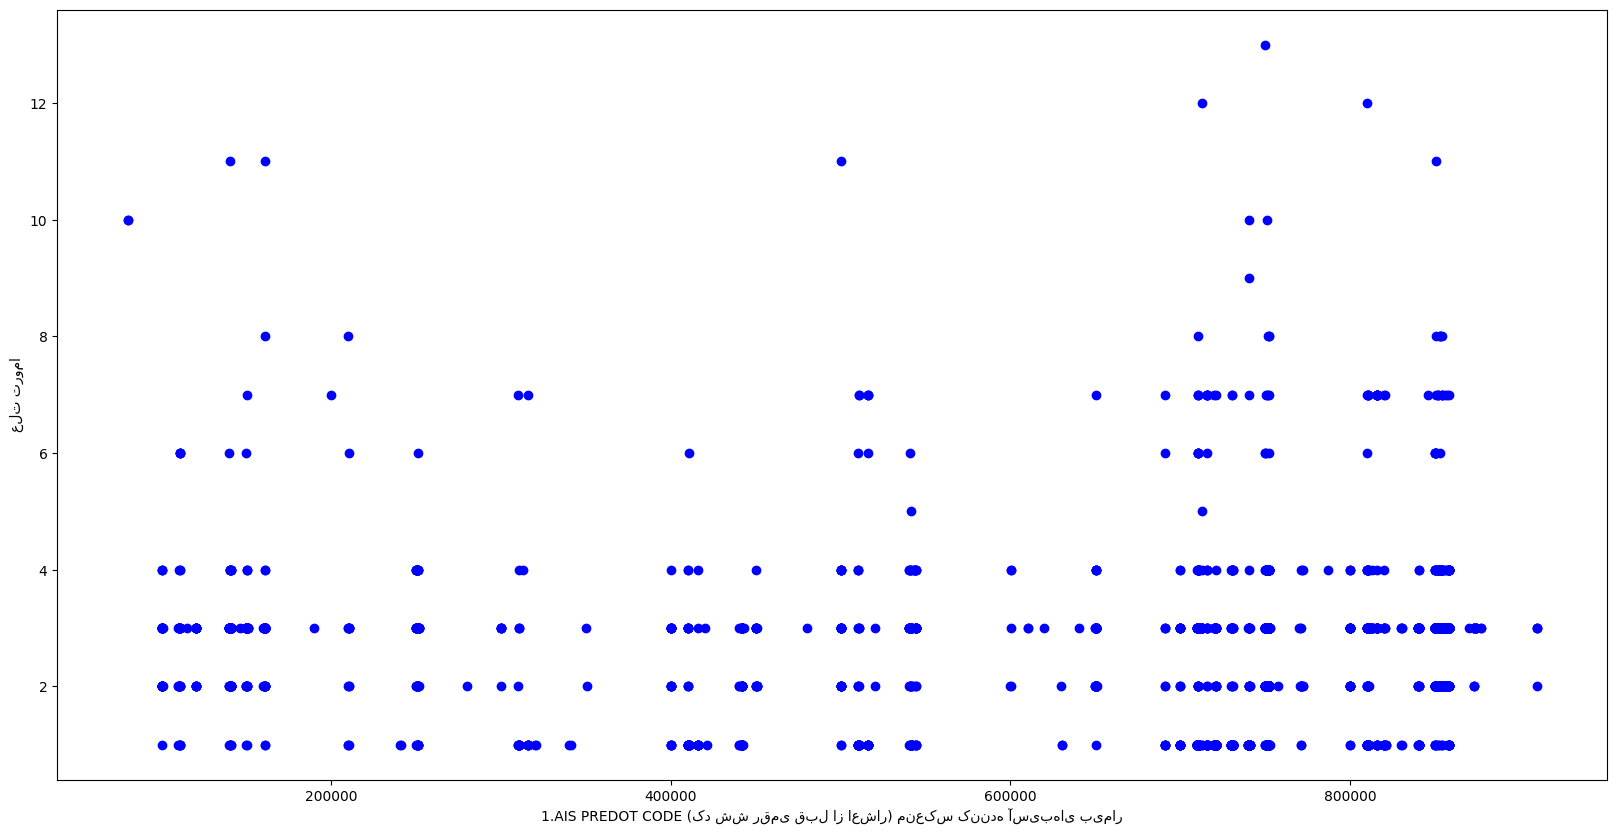

In [19]:
cnames = list(df.columns.values)
print(cnames)
c_x = cnames[6]
c_y = cnames[3]
c_x,c_y

fig, axs = plt.subplots(1,1 , figsize=(20 , 10))

axs.scatter(df[c_x] , df[c_y] , color = 'Blue')
axs.set_xlabel(c_x)
axs.set_ylabel(c_y)
plt.show()


#### Normalization : 

In [20]:
scaler , x = Normalization(df = df.drop(['شناسه بیمار'] , axis = 1))

#### Clustering : 
* KMeans - with Elbow method

Testing Elbow method in Kmeans:   0%|          | 0/48 [00:00<?, ?it/s]

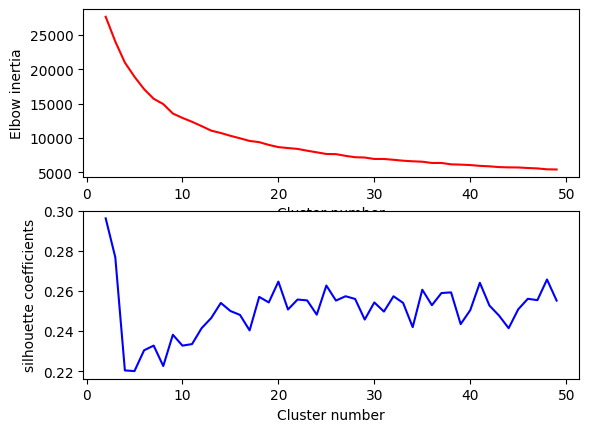

In [21]:
ElbowSilhouette(x = x)

#### Best number of cluster 

In [48]:
numClusters = 15

labels = kmeans(x = x , clusterNum = numClusters)
df['کلاس'] = labels
copy_df['کلاس'] = labels



path = "result/"+str(numClusters)

if not os.path.exists(path):
   os.makedirs(path+"/xlsx")
   os.makedirs(path+"/csv")
   print("The new directory is created!")


The new directory is created!


#### Result : 

In [42]:
df.groupby("کلاس").mean()

شناسه بیمار     جنسیت  سن بیمار هنگام مصدومیت  علت تروما  \
کلاس                                                              
0     1.492434e+06  1.048666               39.045526   2.874411   
1     1.491023e+06  2.001536               54.105991   2.359447   
2     1.481082e+06  1.043750               38.568750   2.443750   
3     1.508194e+06  1.000000               37.761774   2.441950   
4     1.503828e+06  1.000700               34.834734   2.574230   

      تعداد دفعات بستری به علت تروما       ISS  \
کلاس                                             
0                           1.130298  5.248038   
1                           1.101382  4.321045   
2                           3.687500  3.312500   
3                           1.194414  3.723987   
4                           1.175070  2.268908   

      1.AIS PREDOT CODE (کد شش رقمی قبل از اعشار) منعکس کننده آسیب‌های بیمار  \
کلاس                                                                           
0                                         215782.428571                        
1                                         752262.780338                        
2                                         712167.300000                        
3                                         775046.922782                        
4                                         764989.558824                        

      1.تشخیص نهایی آسیب  را انتخاب کنید  
کلاس                                      
0                             121.751962  
1                             103.597542  
2                             103.693750  
3                              33.973713  
4                             195.902661

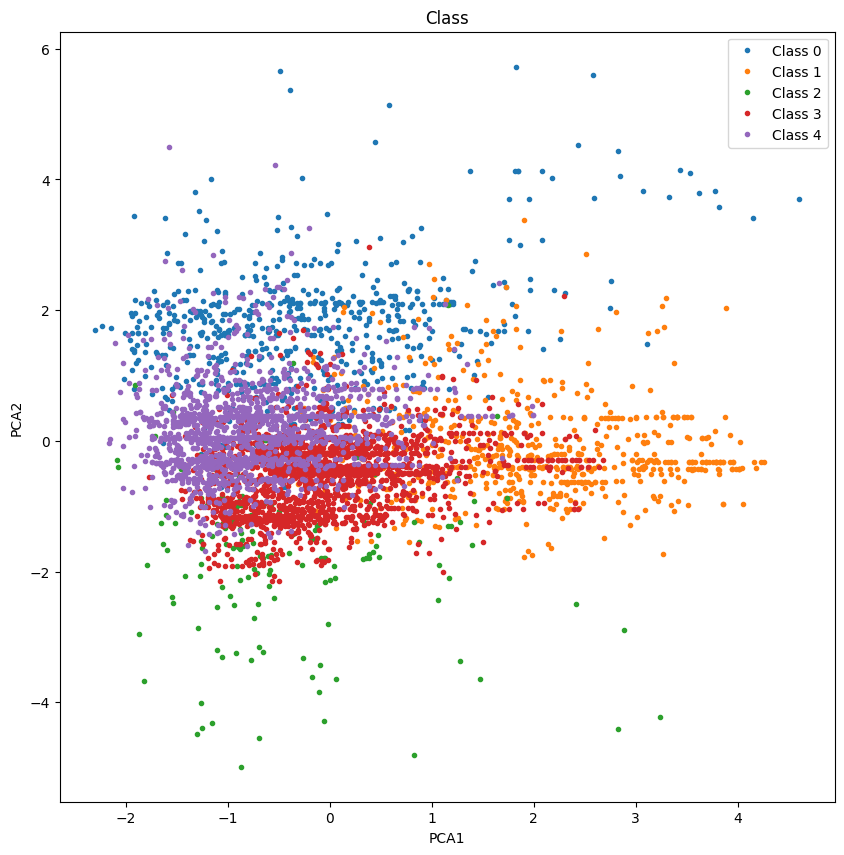

In [45]:
ShowClass2(df = df , x = x)

#### Save : 

In [27]:
# df['کلاس'] = labels
# df[['شناسه بیمار' , 'کلاس']].to_csv('./Data/result.csv', index = False )  


In [50]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

#### save csv

In [51]:
# incl = ['Home', 'Away', 'Shops']    
# for k, g in df[df['D'].isin(incl)].groupby('D'):
#     g.to_csv(f'{k}.csv')  # '{}.csv'.format(k)
# https://stackoverflow.com/questions/50829206/save-pandas-groups-to-separate-csv-files

cnames = list(df.columns.values)
ci = cnames[8]
c_id = cnames[0]

print(ci)
class_list = set(list(df[ci]))
print(class_list)


for k, g in df[df[ci].isin(class_list)].groupby(ci):
    patient_list = g[c_id]
    patient_ck = df_patient[df_patient['Patient ID'].isin(patient_list)]

    patient_ck.to_csv(f'result/{numClusters}/csv/{k}.csv')  # '{}.csv'.format(k)
    patient_ck.to_excel(f'result/{numClusters}/xlsx/{k}.xlsx')  # '{}.xlsx'.format(k)




کلاس
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}


### Hirachical Clustering

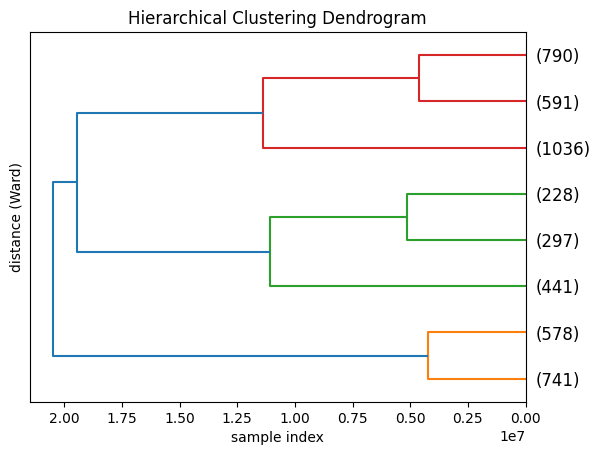

In [20]:

Z = linkage(df, 'ward')
# Plot title
plt.title('Hierarchical Clustering Dendrogram')

# Plot axis labels
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')

# Make the dendrogram
# dendrogram(Z, labels=df.index, leaf_rotation=90)
# # Control number of clusters in the plot + add horizontal line.
# dendrogram(Z, color_threshold=240)
# dendrogram(Z, truncate_mode = 'lastp', p=4 ) # -> you will have 4 leaf at the bottom of the plot
dendrogram(Z, truncate_mode = 'lastp', p=8 ,orientation="left", labels=df.index) # -> you will have 4 leaf at the bottom of the plot

# plt.axhline(y=240, c='grey', lw=1, linestyle='dashed')
 

# Show the graph
plt.show()
